In [11]:
import os
import numpy as np
from matplotlib import pyplot as plt
import sys
import pandas as pd
import csv
from mpl_toolkits.mplot3d import Axes3D
sys.path.insert(0, r'/Users/nenetto/Dev/BiiGTK/src/PythonTools')
%matplotlib inline

frame: Details frame of exported data in the following format:

1. Frame Index (integer) 
2. Time Stamp (double) in seconds
3. Trackable Count (integer) number of trackables tracked in current frame
4. ID
5. x
6. y
7. z
8. qx
9. qy
10. qz
11. qw
12. yaw
13. pitch
14. roll
15. Marker Count (integer) Count of all visibile markers in frame"
16. Marker Detail >for each reconstructed 3d marker< (x,y,z,id)

In [46]:
rotation_file = '/Users/nenetto/Trabajo/AlgiaCervical/DataTest/rotacion.csv'



def getMatrixOptitrack(x, y, z, qx, qy, qz, qw):
    
    R = np.eye(4)
    R[0, 0] = -2 * qy*qy - 2 * qz*qz + 1
    R[0, 1] = 2 * qw*qz + 2 * qx*qy
    R[0, 2] = 2 * qw*qy - 2 * qx*qz
    R[0, 3] = x

    R[1, 0] = 2 * qx*qy - 2 * qw*qz
    R[1, 1] = -2 * qx*qx - 2 * qz*qz + 1
    R[1, 2] = -2 * qw*qx - 2 * qy*qz
    R[1, 3] = y

    R[2, 0] = -2 * qw*qy - 2 * qx*qz
    R[2, 1] = 2 * qw*qx - 2 * qy*qz
    R[2, 2] = -2 * qx*qx - 2 * qy*qy + 1
    R[2, 3] = z

    R[3, 0] = 0.0
    R[3, 1] = 0.0
    R[3, 2] = 0.0
    R[3, 3] = 1.0
    return R


def getDataFromCSVTrackingTools(file):
    data = []
    with open(rotation_file, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if row[0] == 'frame':
                data.append({
                            'time':float(row[2]),\
                            'id':float(row[4]),\
                            'x':float(row[5])*1000,\
                            'y':float(row[6])*1000,\
                            'z':float(row[7])*1000,\
                            'qx':float(row[8]),\
                            'qy':float(row[9]),\
                            'qz':float(row[10]),\
                            'qw':float(row[11])\
                    })

    df = pd.DataFrame(data)
    return df


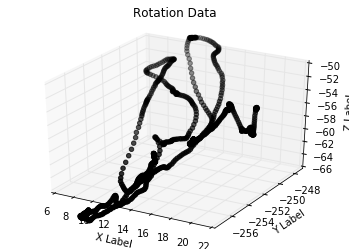

,id,qw,qx,qy,qz,time,x,y,z
0,1,0.626845,-0.165220,0.433516,-0.625964,0.026166,13.72269,-255.14588,-60.07137
1,1,0.626847,-0.165356,0.433433,-0.625984,0.036105,13.72883,-255.14627,-60.08019
2,1,0.626874,-0.165317,0.433353,-0.626023,0.046114,13.73521,-255.15610,-60.07954
3,1,0.626848,-0.165310,0.433378,-0.626033,0.056128,13.73911,-255.16105,-60.08875
4,1,0.626871,-0.165327,0.433320,-0.626046,0.066043,13.73487,-255.15881,-60.09486


In [51]:
df = getDataFromCSVTrackingTools(rotation_file)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.x, df.y, df.z, c='black', marker='o')

ax.axis('equal')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')

plt.show()
df.head(5)

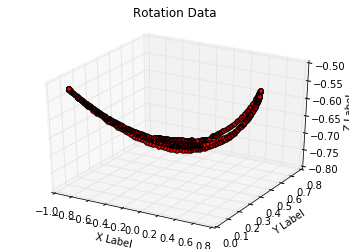

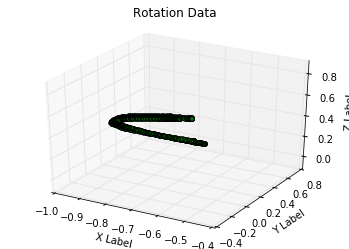

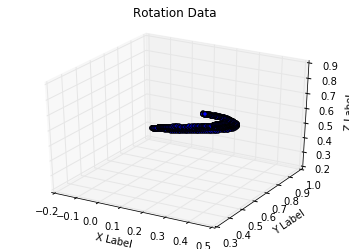

In [49]:
pointx = np.array([1, 0, 0, 1])
pointy = np.array([0, 1, 0, 1])
pointz = np.array([0, 0, 1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointx)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='r', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')

plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointy)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='g', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')

plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointz)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='b', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')

plt.show() 

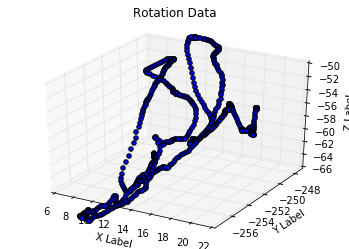

In [52]:
plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(df['x'].loc[i],df['y'].loc[i],df['z'].loc[i],df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,np.array([0,0,0,1]))
    ax.scatter(pmov[0],pmov[1],pmov[2], c='b', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')

ax.axis('equal')

plt.show() 